# 2019 Census Data State & Pop


In [1]:
import pandas as pd
import json
import requests
from api_keys import census_key

#for census json pull in 
year = "2019"
dsource = "pep"
dname = "population"
cols = "NAME,POP,DATE_DESC"
group = "group(B02015)"
state = "*"

base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'

data_url = f'{base_url}?get={cols}&for=state:{state}&key={census_key}'
            
response = requests.get(data_url).json()

In [2]:
#create df from JSON
initial_df = pd.DataFrame(response)
initial_df.head()

,0,1,2,3
0,NAME,POP,DATE_DESC,state
1,Alabama,4903185,7/1/2019 population estimate,01
2,Alaska,731545,7/1/2019 population estimate,02
3,Arizona,7278717,7/1/2019 population estimate,04
4,Arkansas,3017804,7/1/2019 population estimate,05


In [3]:
#remove unwanted columns
filtered_df = initial_df[[0,1]]
state_pop = filtered_df.drop([0,8,52])
#find & rename column titles 
list(state_pop.columns)
state_pop.columns = ["STATE","Population"]
state_pop.head()

,STATE,Population
1,Alabama,4903185
2,Alaska,731545
3,Arizona,7278717
4,Arkansas,3017804
5,California,39512223


In [4]:
#read in brewery count csv
csv_df = pd.read_csv('./brewery_count_by_state.csv')  
csv_df

,STATE,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,20,23,25,25,28,35,36,45,51,59,66,72,75
1,AL,7,9,15,23,25,30,37,52,55,66,68,77,84
2,AR,5,7,13,18,23,29,34,44,53,58,70,76,82
3,AZ,37,45,55,59,77,91,110,130,146,157,170,179,184
4,CA,358,401,472,528,654,788,927,1106,1236,1370,1465,1524,1571
5,CO,129,149,185,234,300,352,386,448,500,544,561,586,614
6,CT,21,20,24,39,50,59,76,103,124,149,162,172,176
7,DC,4,6,5,11,12,13,13,13,13,15,17,19,21
8,DE,11,12,13,13,15,21,25,33,38,43,47,51,54
9,FL,60,71,89,113,158,205,264,338,386,464,500,531,571


In [5]:
#drop na
clean_csv = csv_df.dropna()
clean_csv = clean_csv.drop([7])
clean_csv

,STATE,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,20,23,25,25,28,35,36,45,51,59,66,72,75
1,AL,7,9,15,23,25,30,37,52,55,66,68,77,84
2,AR,5,7,13,18,23,29,34,44,53,58,70,76,82
3,AZ,37,45,55,59,77,91,110,130,146,157,170,179,184
4,CA,358,401,472,528,654,788,927,1106,1236,1370,1465,1524,1571
5,CO,129,149,185,234,300,352,386,448,500,544,561,586,614
6,CT,21,20,24,39,50,59,76,103,124,149,162,172,176
8,DE,11,12,13,13,15,21,25,33,38,43,47,51,54
9,FL,60,71,89,113,158,205,264,338,386,464,500,531,571
10,GA,26,25,31,37,48,54,69,102,121,158,186,208,234


In [6]:
#create new df filtered to state, 2019 to be able to replace col names on
nineteen_csv = pd.DataFrame(clean_csv[["STATE","2019"]])
nineteen_csv

,STATE,2019
0,AK,59
1,AL,66
2,AR,58
3,AZ,157
4,CA,1370
5,CO,544
6,CT,149
8,DE,43
9,FL,464
10,GA,158


In [7]:
# create dict of abbrev names to full names
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

#replace abbrev with full names
nineteen_csv['STATE'] = nineteen_csv['STATE'].replace(states)

nineteen_csv

,STATE,2019
0,Alaska,59
1,Alabama,66
2,Arkansas,58
3,Arizona,157
4,California,1370
5,Colorado,544
6,Connecticut,149
8,Delaware,43
9,Florida,464
10,Georgia,158


In [13]:
#merge dfs
merged_df = pd.merge(state_pop, nineteen_csv, on = "STATE")

merged_df = merged_df.astype({"2019":"int","Population":"int"})

merged_df

,STATE,Population,2019
0,Alabama,4903185,66
1,Alaska,731545,59
2,Arizona,7278717,157
3,Arkansas,3017804,58
4,California,39512223,1370
5,Colorado,5758736,544
6,Delaware,973764,43
7,Connecticut,3565287,149
8,Florida,21477737,464
9,Georgia,10617423,158


<AxesSubplot:ylabel='Frequency'>

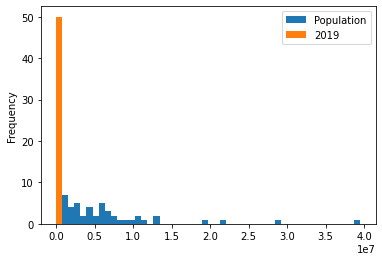

In [23]:
# import matplot
import matplotlib.pyplot as plt
merged_df.plot.hist(bins=len(merged_df["STATE"]))

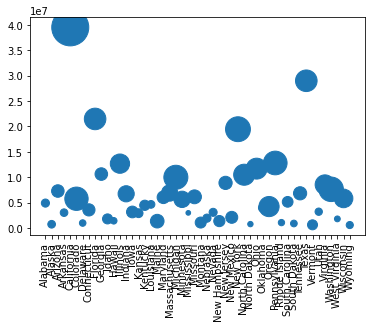

In [31]:
# import matplot
import matplotlib.pyplot as plt

x=merged_df["STATE"]
y=merged_df["Population"]
s=merged_df["2019"]

# # Build scatter plot for pop vs brewery count
#plt.scatter(x=merged_df.loc["STATE"], y=merged_df.loc["Population"], s=merged_df.loc["2019"]*1000)
brew_bubble = plt.scatter(x, y, s)
plt.xticks(rotation = 90)

# # Incorporate the other graph properties
# plt.title("Brewery Count vs Population in 2019")
# plt.xlabel("Population")
# plt.xticks(rotation = 45)
# plt.ylabel("Population")
#plt.tight_layout()

# # Save the figure
# #plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

In [25]:
import hvplot.pandas
import numpy as np 

#merged_df.hvplot(x='STATE', y='Population', by='2019', kind='scatter', alpha=0.2, persist=True)

scatter_counts = merged_df.hvplot.scatter(x='STATE', y='Population', c='2019')
scatter_counts.opts(xrotation=90)


:Scatter   [STATE]   (Population,2019)